In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%config InlineBackend.figure_format = 'png'

In [2]:
data = pd.read_csv('train.csv')


In [3]:
data.describe(include = 'all')

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
count,38312,38312,36633,38312,38312,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312,38312,38312,38312,38312,38312,38312.000000
unique,38312,9,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,2,3,2,2,7,NaN
top,YAK/S/28960,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAGOS,Yes,Married,No,No,1,NaN
freq,1,11695,25578,26880,21310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6204,34995,31022,38161,34709,18867,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,NaN,NaN,NaN,NaN,NaN,NaN,0.084595
std,NaN,NaN,NaN,NaN,NaN,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,NaN,NaN,NaN,NaN,NaN,NaN,0.278282
min,NaN,NaN,NaN,NaN,NaN,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


The total number of the promoted and unpromoted workers in each variable is shown in the data frame below

In [72]:
data.groupby('Promoted_or_Not').count()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
Promoted_or_Not,,,,,,,,,,,,,,,,,,
0,35071,35071,33474,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071,35071
1,3241,3241,3159,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241,3241


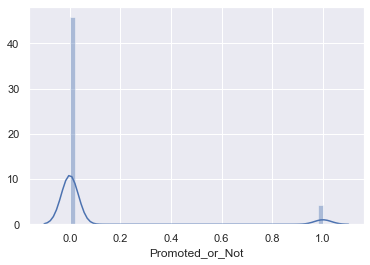

In [4]:
sns.distplot(data.Promoted_or_Not)

The Division of the promoted employees

The visualization gives us the divisions with their number of promoted employees

In [5]:
#The Division with the most promoted employees
promoted_employees = data[data['Promoted_or_Not'] == 1]
print('The Division with the most promoted employees is', promoted_employees.Division.value_counts().idxmax(),'. They have', promoted_employees.Division.value_counts().values.max(), 'promoted workers')

The Division with the most promoted employees is Commercial Sales and Marketing . They have 841 promoted workers


A barplot to visualize the Division with their number of promoted employees

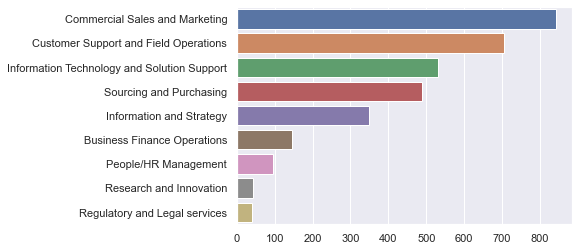

In [6]:
sns.barplot(promoted_employees.Division.value_counts().values, promoted_employees.Division.value_counts().index, orient = 'horizontal')

The Division with the number of their unpromoted employees

In [25]:
#The Division with unpromoted employees
unpromoted_employees = data[data['Promoted_or_Not'] == 0]

In [8]:
Division_with_most_unpromoted = unpromoted_employees.Division.value_counts().idxmax()
print('The Division with the most unpromoted employees is',Division_with_most_unpromoted,'. They have', unpromoted_employees.Division.value_counts().max(), 'unpromoted workers'  )

The Division with the most unpromoted employees is Commercial Sales and Marketing . They have 10854 unpromoted workers


a barplot showing the number of unpromoted employees in each Division

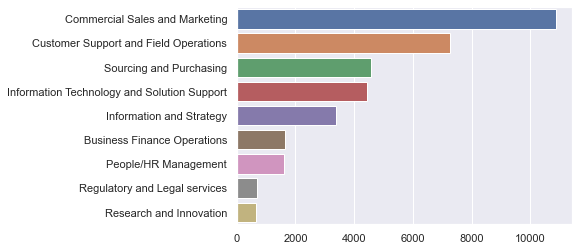

In [10]:
sns.barplot(unpromoted_employees.Division.value_counts().values, unpromoted_employees.Division.value_counts().index, orient = 'horizontal')

from this count plot below, we see that Commercial sales and marketing has both highest number of promoted and unpromoted workers

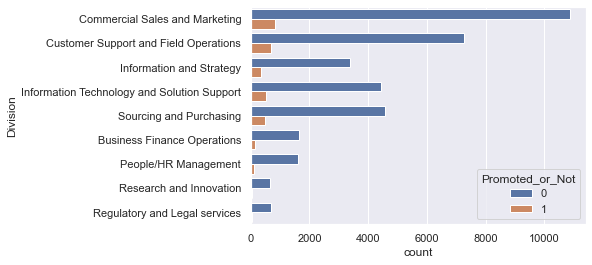

In [26]:
#the count plot proves the that the two box plot above 
sns.countplot(y = data.Division, hue = data.Promoted_or_Not)



The mean distribution of the promotion status of each Division

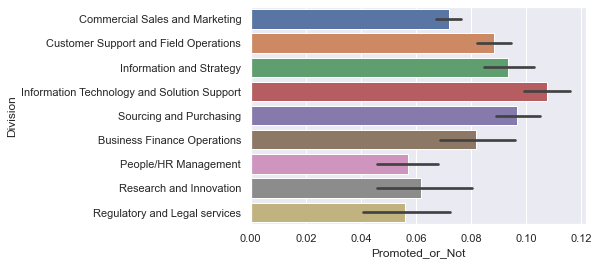

In [12]:
sns.barplot(data.Promoted_or_Not,data.Division, orient = 'horizontal')

mean distribution of the Divisions

In [13]:
data.groupby('Division').mean()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
Division,,,,,,,,
Business Finance Operations,2.303471,1988.928891,7.781355,2014.199328,0.419933,0.027436,52.192049,0.081747
Commercial Sales and Marketing,2.280547,1986.110133,7.081018,2013.081060,0.264386,0.020693,42.227448,0.071911
Customer Support and Field Operations,2.163928,1984.982315,8.613132,2012.602157,0.433714,0.023580,52.195033,0.088298
Information Technology and Solution Support,2.252019,1986.176090,7.286955,2013.115711,0.341882,0.024233,71.941236,0.107431
Information and Strategy,2.341575,1988.550658,8.119457,2014.041655,0.407417,0.025262,76.630207,0.093523
People/HR Management,2.054577,1986.783451,7.812500,2013.365023,0.345070,0.021714,41.943075,0.056925
Regulatory and Legal services,2.085948,1987.285130,7.114598,2014.521146,0.327422,0.027285,51.819918,0.055935
Research and Innovation,2.393678,1988.211207,8.110632,2014.508621,0.403736,0.022989,76.630747,0.061782
Sourcing and Purchasing,2.324624,1985.096595,7.741489,2012.643310,0.377276,0.023951,62.114014,0.096793


the plotting of the trainings attended to the promotion status

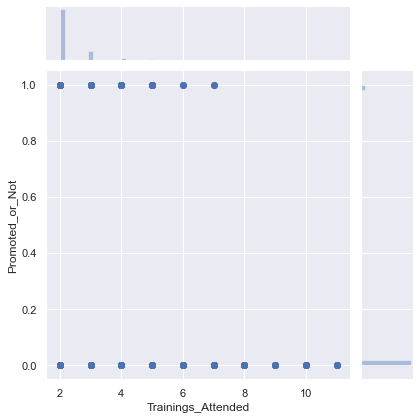

In [14]:
sns.jointplot(data.Trainings_Attended, data.Promoted_or_Not)

From the plot above, the trainings attended, none of the promoted workers attended more than 8 trainings.

some of the unpromoted workers attended more than the promoted workers but were not promoted. What other factors could be responsible for not being promoted ?

There is a pairplot distribution below.

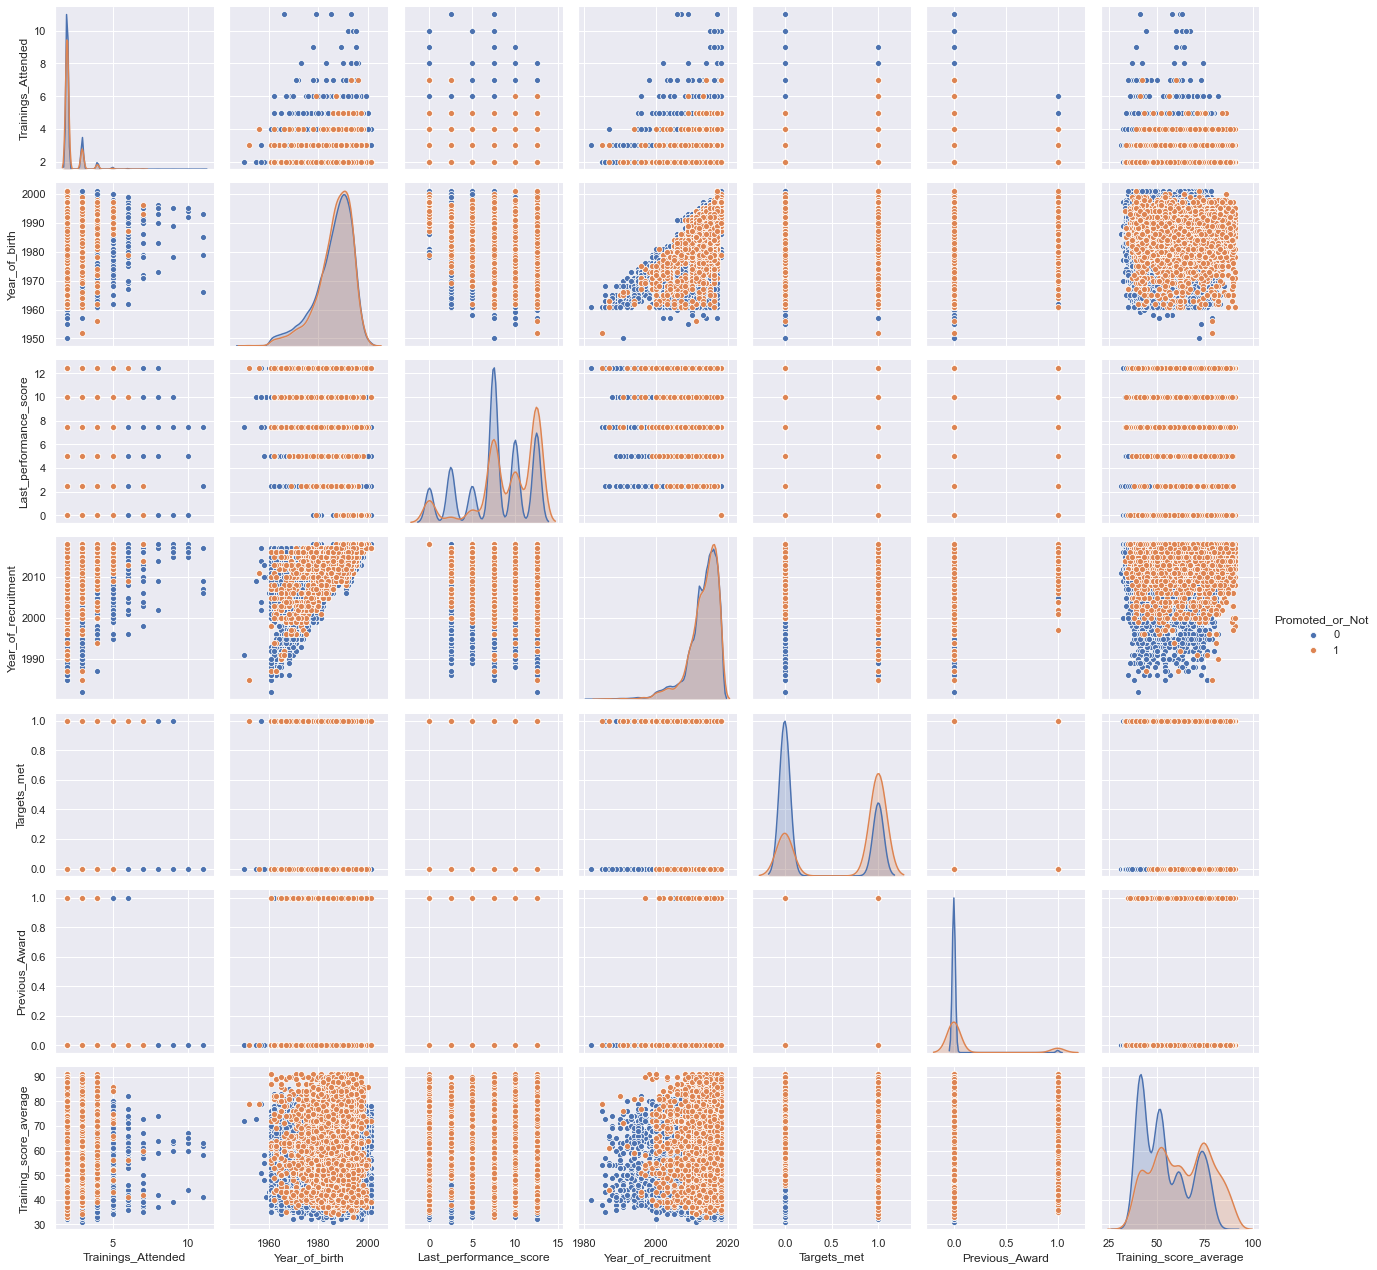

In [16]:
sns.pairplot(data, hue = 'Promoted_or_Not')

From the plot of the trainings attended versus Last performance score, the statistics shows that: 

1. The unpromoted workers that attended training more than 6 times, with a performance scores that are the same to the promote    workers were not promoted.

2. The unpromoted worker with the highest Last performance score attended more trainings than the promoted worker with the same    Last performance score

3. Most of the unpromoted workers had good performance score with good attendance in training
4. The statistics of the target met shows that, few of the workers that met the target were not promoted

we need to know the qualifications of those that were not promoted

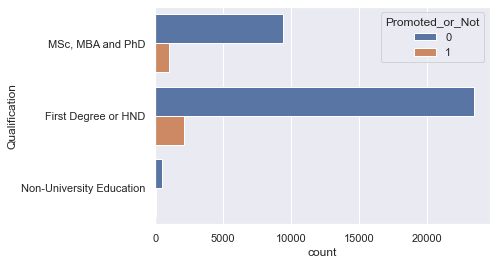

In [21]:
#the count plt proves the that the two box plot above 
sns.countplot(y = data.Qualification, hue = data.Promoted_or_Not)

From the qualification statistics above: 

1. First Degree or HND holders have both the highest number of promoted and unpromoted workers

2. The least promoted workers have Non-university Education

Below is the statistics

In [20]:
#the ones without university education
non_uni = data[data['Qualification'] == 'Non-University Education' ]
non_uni_value = non_uni[non_uni['Promoted_or_Not'] == 1].Promoted_or_Not.value_counts().values

In [21]:
#first degree and HND
FGH = data[data['Qualification'] == 'First Degree or HND']
FGH_value = FGH[FGH['Promoted_or_Not'] == 1].Promoted_or_Not.value_counts().values


In [22]:
#Msc,Mbd,Phd

MMP = data[data['Qualification'] == 'MSc, MBA and PhD']
MMP_value = MMP[MMP['Promoted_or_Not'] == 1].Promoted_or_Not.value_counts().values

A box plot of the number of promoted workers and their respective qualifications is shown below.

Note: Of all the 3241	promoted workers, 3159 workers' qualifications were accounted and documented

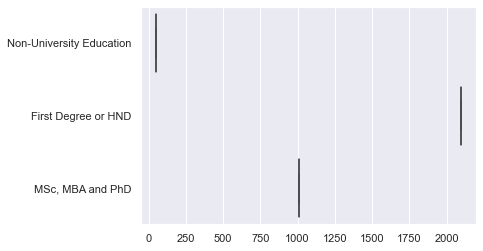

In [23]:
x = ['Non-University Education', 'First Degree or HND', 'MSc, MBA and PhD']

y = [non_uni_value, FGH_value, MMP_value]

sns.boxplot(y, x, orient = 'horizontal')

Let's see the distribution of their qualifications in a plot of the promoted status against all other quantitative variables

The reason is to verify if the pattern of promotion is really based on their qualifications

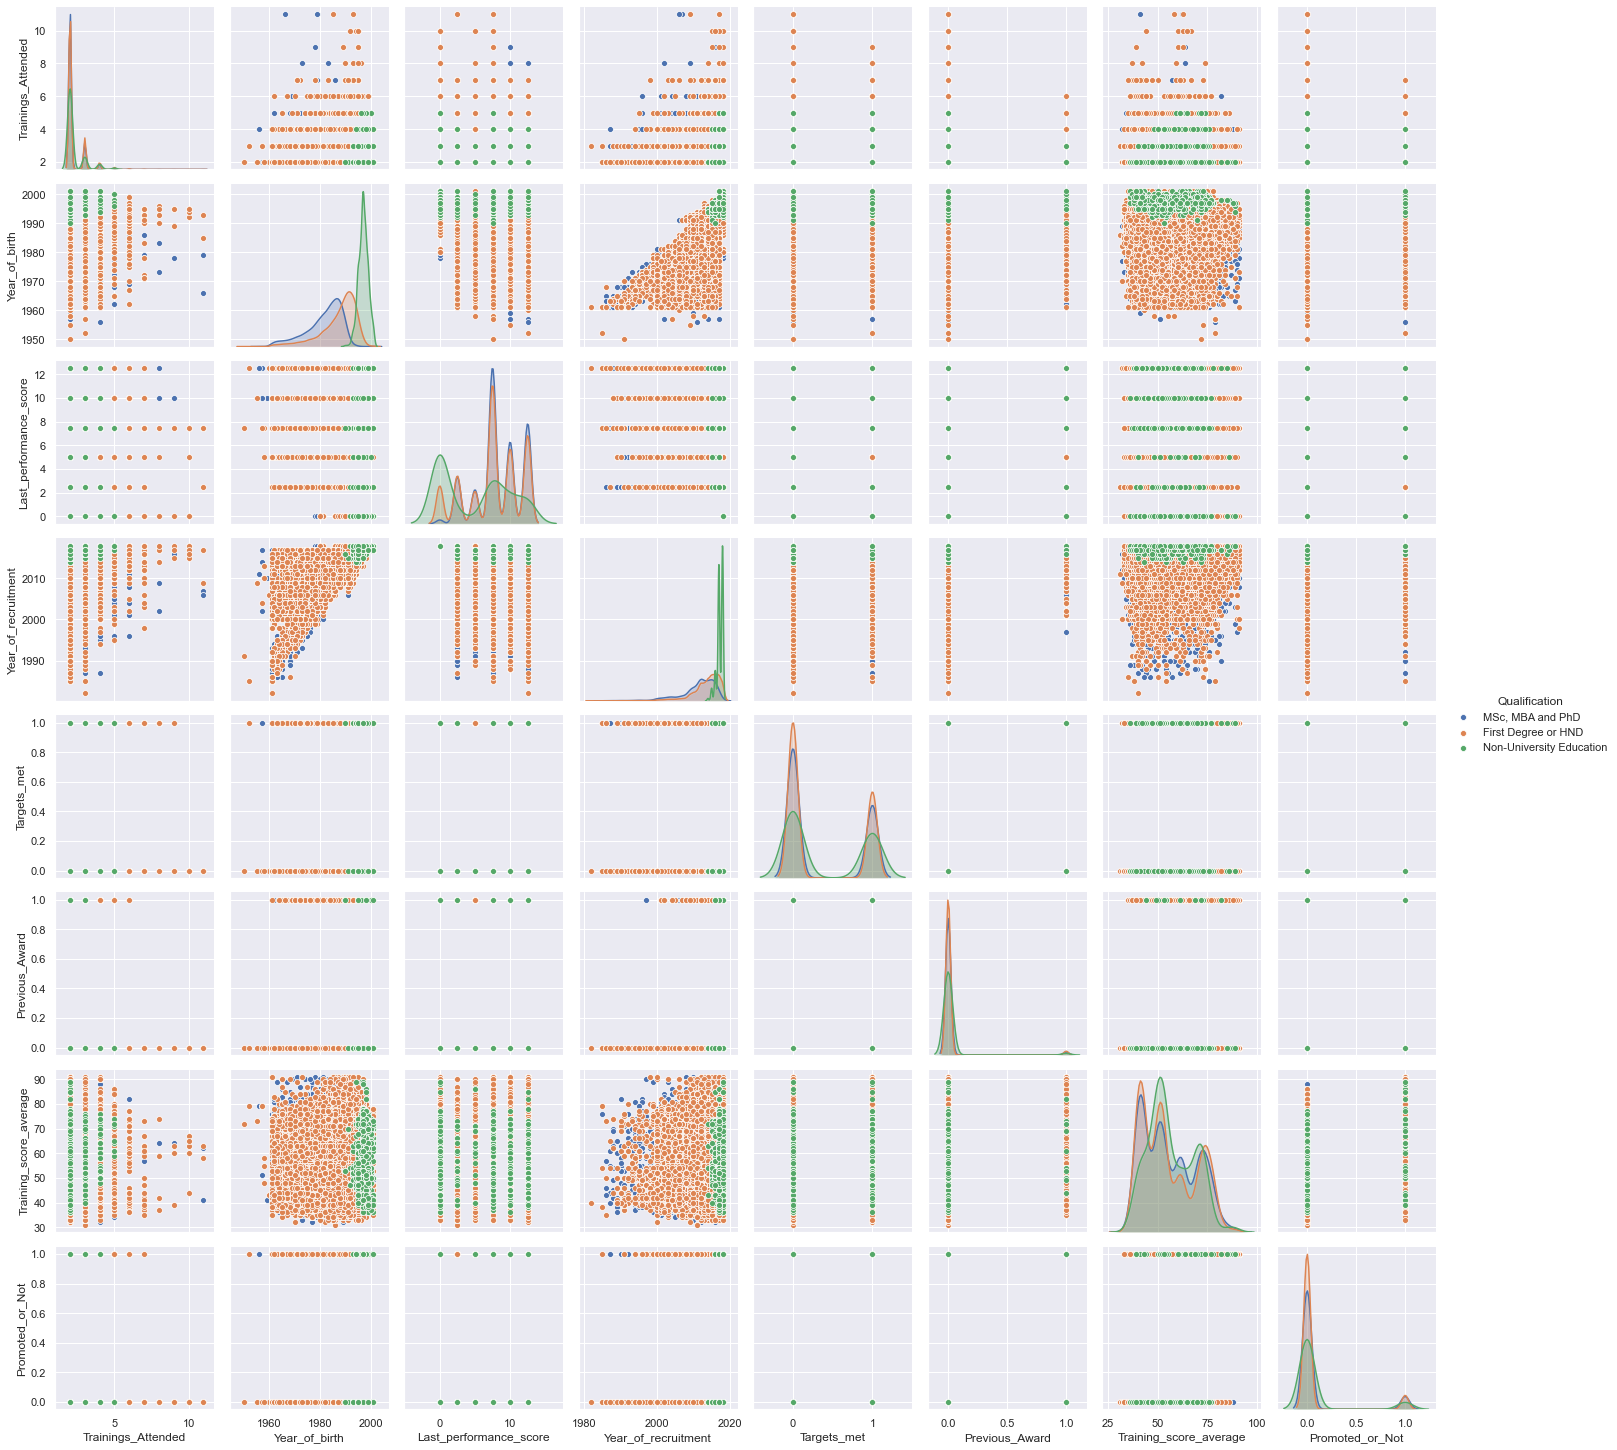

In [24]:
sns.pairplot(data, hue = 'Qualification')

It has been established ealier that the most promoted and unpromoted workers are of First Degree or HND qualifications

However, according to this visulaization, 

1. Most workers promoted based on Last_performance_score, Targets met, previous award, Training_score_average were of Non          University Education qualification

Below is the distribution of the male and female

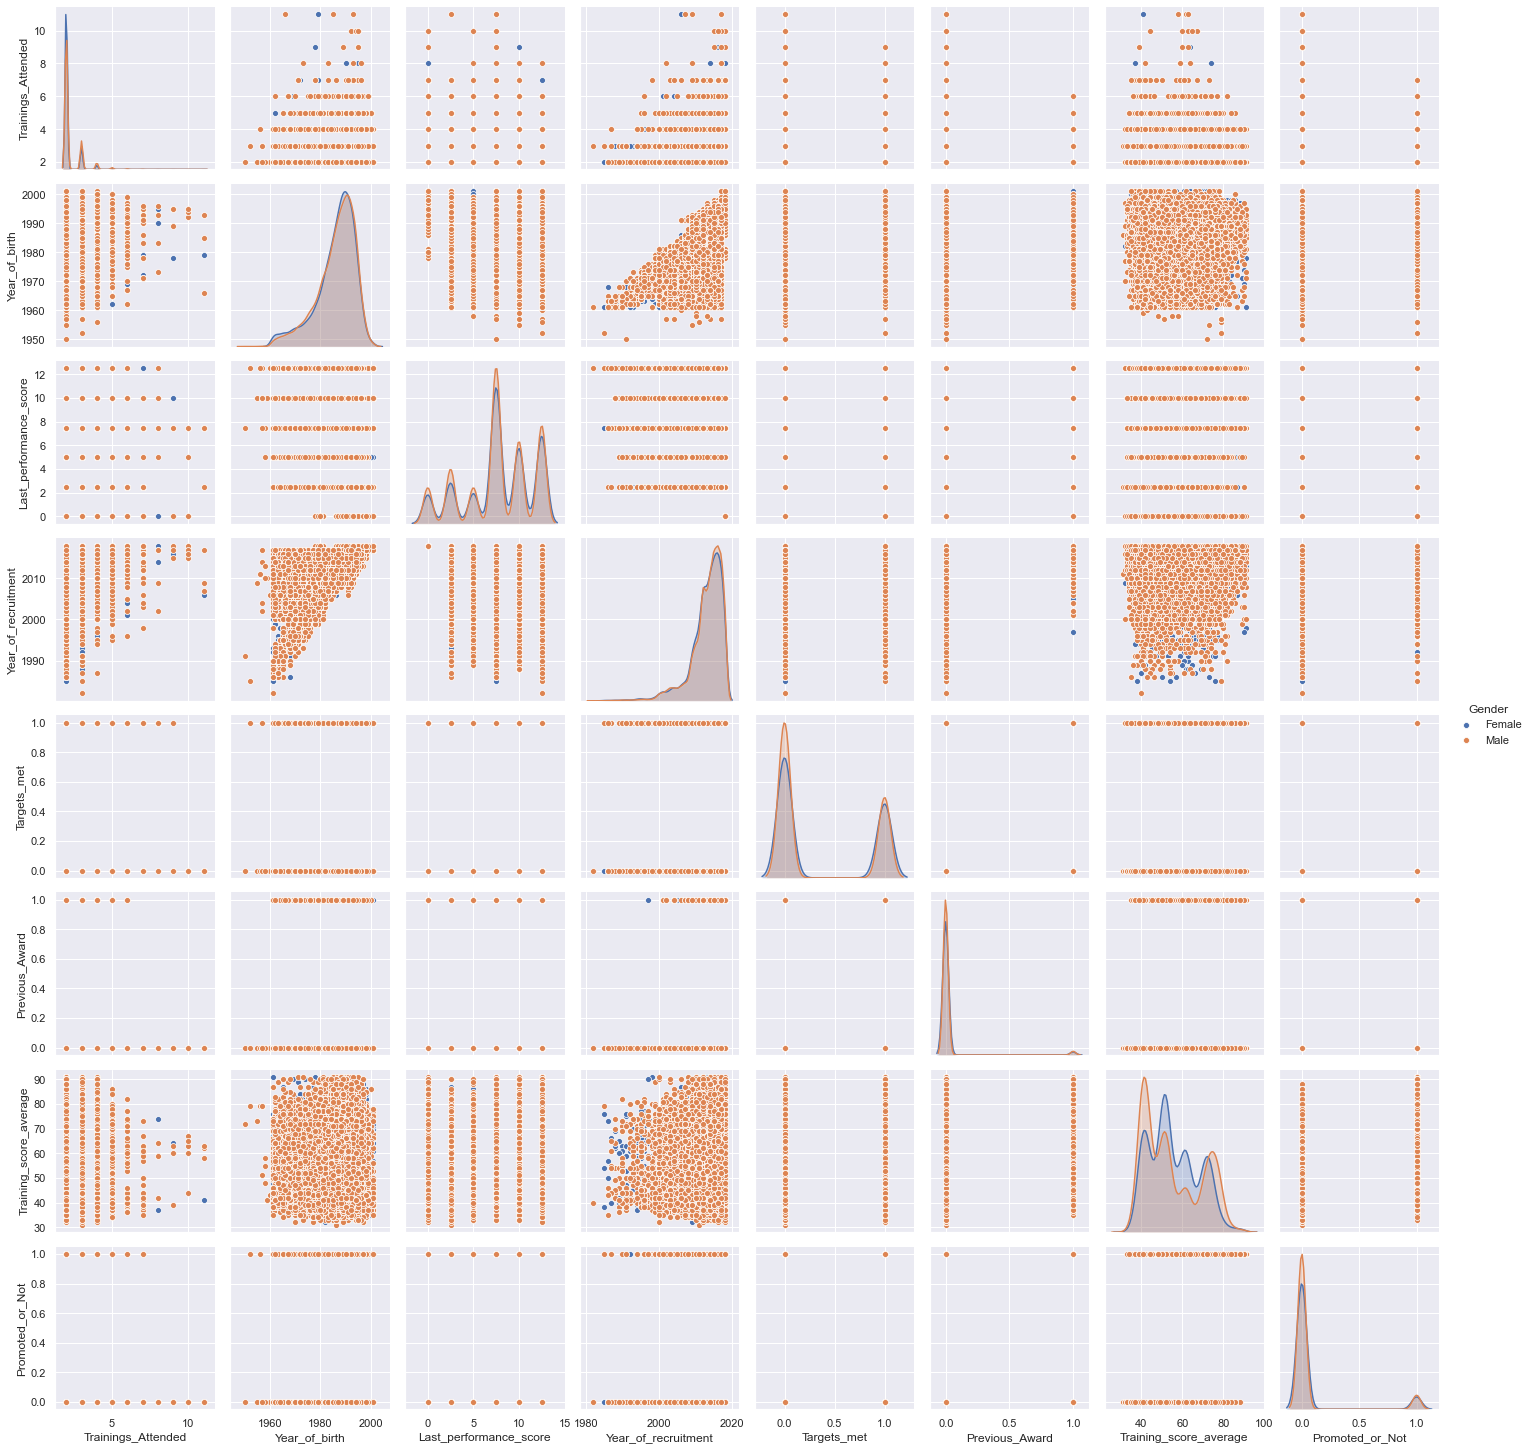

In [68]:
sns.pairplot(data, hue = 'Gender')

The countplot of the Gender's promotion status

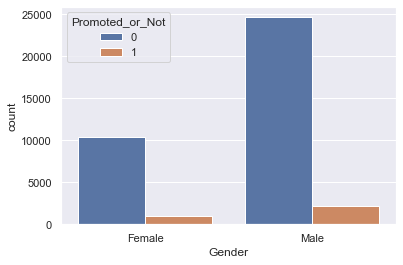

In [28]:
sns.countplot(x = 'Gender', hue = 'Promoted_or_Not', data = data)

From the analysis of the pairplot:

1. The person with the highest number of training attendance is a female but was not promoted
2. The individual with the highest Last performance score is a male
3. Highest number of promoted and unpromoted workers are males. The countplot also proves this
4. From the quantitative analysis, most of the unpromoted workers have the similar ratings in tainings attended, year of birth,    Last performance score, year of recruitment, targets met, previous award, training score average with the promoted workers,    yet they were not promoted.

Conclusion from the total visualizations, there was no exact pattern to justify the promoted workers from the unpromoted workers:

1. The pattern shows that most unpromoted workers have similar data to those promoted, some even surpass the promoted workers      based on the quantitative analysis and were not promoted